<a href="https://colab.research.google.com/github/anefthma/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/V2_Justes_Adams_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 0 - Revert your version of Pandas right from the start
I don't want any of you to get stuck because of Pandas bugs, so right from the get-go revert back to version `0.23.4`
- Run the cell below
- Then restart your runtime. Go to `Runtime`  ->  `Restart runtime...` in the top menu (or click the "RESTART RUNTIME" button that shows up in the output of the cell below).


In [0]:
!pip install pandas==0.23.4

     |████████████████████████████████| 8.9MB 4.8MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=0.24.0, but you'll have pandas 0.23.4 which is incompatible.
  Found existing installation: pandas 0.24.2
    Uninstalling pandas-0.24.2:
      Successfully uninstalled pandas-0.24.2


## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
import pandas as pd
import numpy as np

In [0]:
from google.colab import files
uploaded = files.upload()

In [243]:
df = pd.read_csv('haberman.data', header=None)
df.head(10)

,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [244]:

df.columns = ('Age', 'Year_of_Op', '#_Positive_Axillary_Nodes', 'Survival_Status')
df.head()

,Age,Year_of_Op,#_Positive_Axillary_Nodes,Survival_Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [245]:
df.describe()

,Age,Year_of_Op,#_Positive_Axillary_Nodes,Survival_Status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [246]:
df.Survival_Status = df.Survival_Status.replace(to_replace =2, 
                          value =0)

df.head(10)

,Age,Year_of_Op,#_Positive_Axillary_Nodes,Survival_Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,0
8,34,66,9,0
9,34,58,30,1


In [0]:
for x in df:
  if x == 'NaN':
    print(occurence) # checking for NaN values, there is no NAN :)

In [0]:
df.head()

,Age,Year_of_Op,#_Positive_Axillary_Nodes,Survival_Status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [248]:
df.tail()

,Age,Year_of_Op,#_Positive_Axillary_Nodes,Survival_Status
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,0
305,83,58,2,0


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [249]:
df.describe()

,Age,Year_of_Op,#_Positive_Axillary_Nodes,Survival_Status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.735294
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


In [250]:
SurvStatus = pd.cut(df['Survival_Status'], 5)
AgeBin = pd.cut(df['Age'], 5)
OpYear = pd.cut(df['Year_of_Op'], 5)
ct1 = pd.crosstab(AgeBin, SurvStatus)
ct1


Survival_Status,"(-0.001, 0.2]","(0.8, 1.0]"
Age,,
"(29.947, 40.6]",4,39
"(40.6, 51.2]",31,68
"(51.2, 61.8]",27,69
"(61.8, 72.4]",16,43
"(72.4, 83.0]",3,6


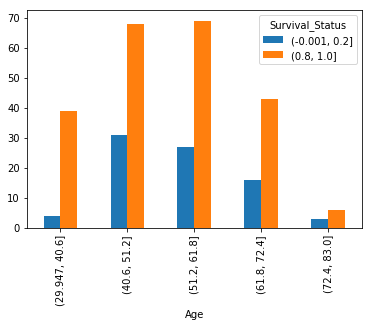

In [251]:
ct1.plot(kind='bar')

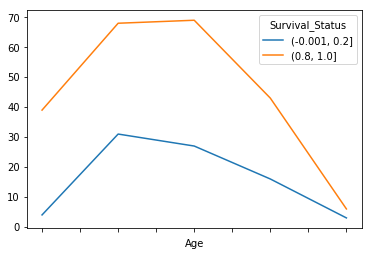

In [252]:
ct1.plot()

## Part 3 - DataFrame Filtering

Use DataFrame filtering to subset the data into two smaller dataframes. You should make one dataframe for individuals who survived >5 years and a second dataframe for individuals who did not. 

Create a graph with each of the dataframes (can be the same graph type) to show the differences in Age and Number of Positive Axillary Nodes Detected between the two groups.

In [253]:
df2 = df[df.Survival_Status == 0]
df2.head(10)

,Age,Year_of_Op,#_Positive_Axillary_Nodes,Survival_Status
7,34,59,0,0
8,34,66,9,0
24,38,69,21,0
34,39,66,0,0
43,41,60,23,0
44,41,64,0,0
45,41,67,0,0
53,42,69,1,0
54,42,59,0,0
62,43,58,52,0


In [254]:
df3 = df[df.Survival_Status == 1]
df3.head(10)

,Age,Year_of_Op,#_Positive_Axillary_Nodes,Survival_Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
9,34,58,30,1
10,34,60,1,1
11,34,61,10,1


In [255]:
AxNode2Bins = pd.cut(df2['#_Positive_Axillary_Nodes'], 3)
Age2Bins = pd.cut(df2['Age'], 3)
ct2 = pd.crosstab(AxNode2Bins, Age2Bins)
ct2

Age,"(33.951, 50.333]","(50.333, 66.667]","(66.667, 83.0]"
#_Positive_Axillary_Nodes,,,
"(-0.052, 17.333]",27,34,9
"(17.333, 34.667]",5,4,0
"(34.667, 52.0]",1,1,0


In [256]:
AxNode3Bins = pd.cut(df3['#_Positive_Axillary_Nodes'], 3)
Age3Bins = pd.cut(df3['Age'], 3)
ct3 = pd.crosstab(AxNode3Bins, Age3Bins)
ct3

Age,"(29.953, 45.667]","(45.667, 61.333]","(61.333, 77.0]"
#_Positive_Axillary_Nodes,,,
"(-0.046, 15.333]",67,101,47
"(15.333, 30.667]",3,4,2
"(30.667, 46.0]",0,1,0


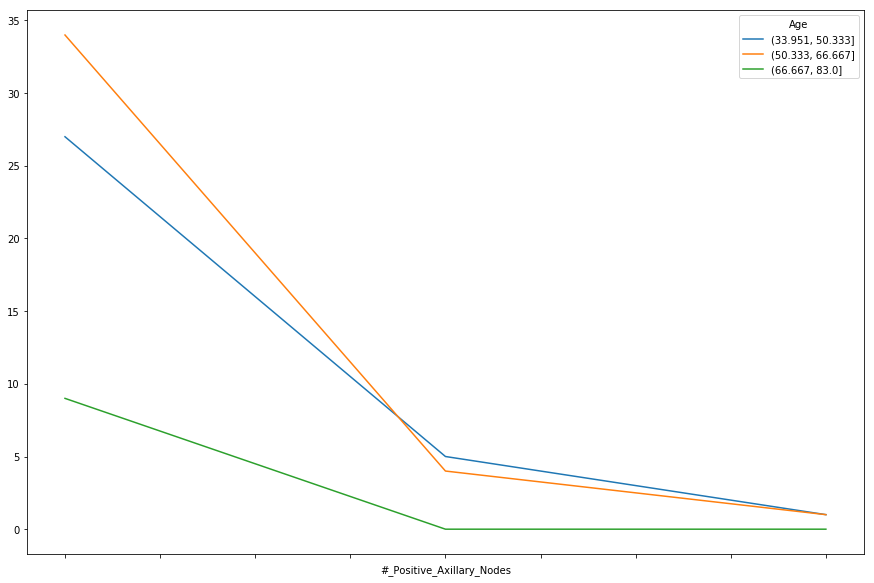

In [263]:
ct2.plot(figsize=(15,10)) #group for not survived

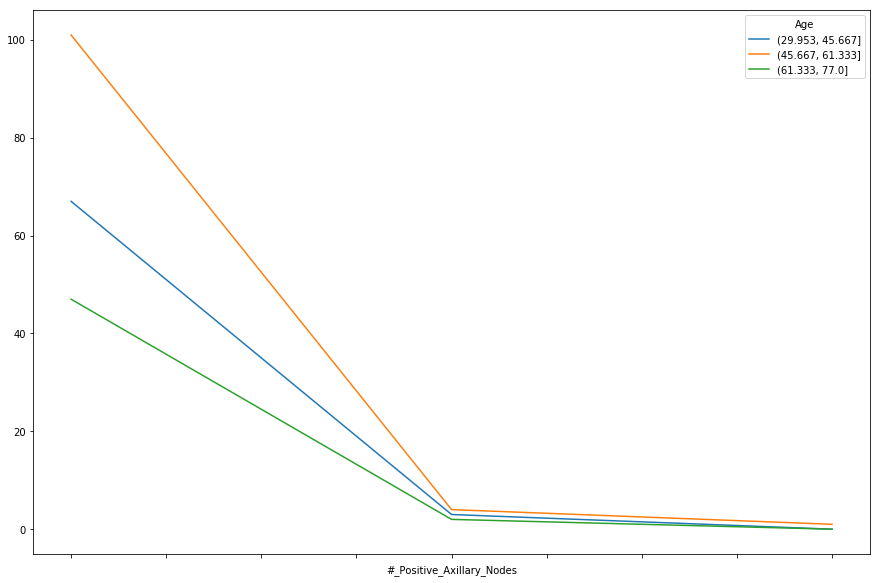

In [262]:
ct3.plot(figsize=(15,10)) #group for survived

## Part 4 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival? (As that feature goes up in value rate of survival increases)
- What is at least one feature that looks to have a negative relationship with survival? (As that feature goes down in value rate of survival increases)
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

**1: Age could have a positive relationship with survival: In both graphs, there are no people in the highest age group who were also in the largest ax node group.
2: Positive Ax Nodes could have a negative relationship with survival: In both graphs, the number of those who survived decreases as the Positive Ax Nodes increases
3: In the graph of those who did not survive,, towards the greatest # of Axillary Nodes, the number of those in the higher age group increases slightly while the other two decrease. This means that as you get older, you are a bit more likely to have more positive ax nodes, and therefore more at risk for death, even if it's only slightly.  **

In [264]:
df.head(10) # JUST SOME TESTS

,Age,Year_of_Op,#_Positive_Axillary_Nodes,Survival_Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,0
8,34,66,9,0
9,34,58,30,1


In [265]:
SurvBins1 = pd.cut(df['Survival_Status'], 10)# just some tests
DateBins1 = pd.cut(df['Year_of_Op'], 10)
testct = pd.crosstab(SurvBins1, DateBins1)
testct

Year_of_Op,"(57.989, 59.1]","(59.1, 60.2]","(60.2, 61.3]","(61.3, 62.4]","(62.4, 63.5]","(63.5, 64.6]","(64.6, 65.7]","(65.7, 66.8]","(66.8, 67.9]","(67.9, 69.0]"
Survival_Status,,,,,,,,,,
"(-0.001, 0.1]",21,4,3,7,8,8,13,6,4,7
"(0.9, 1.0]",42,24,23,16,22,23,15,22,21,17


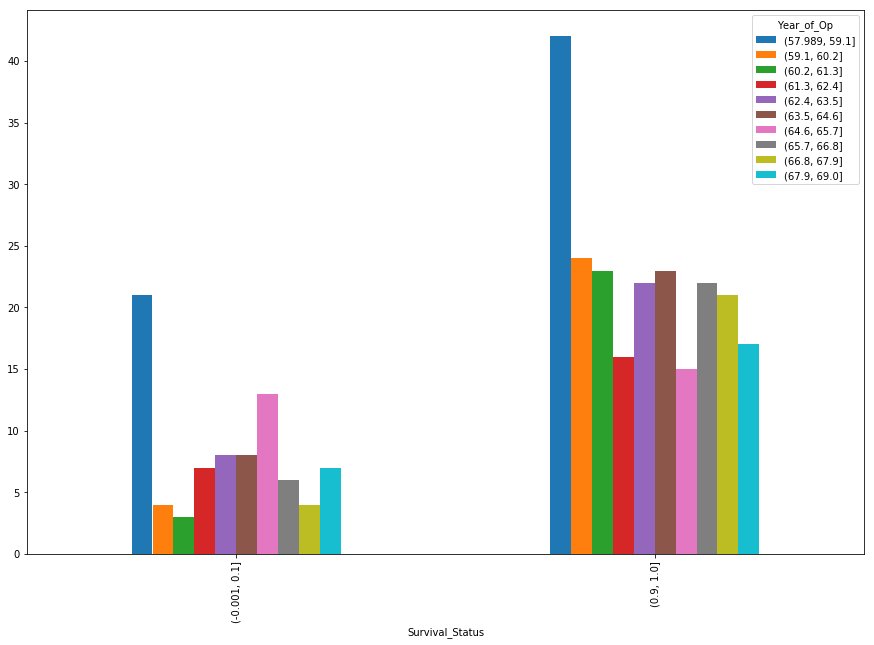

In [266]:
testct.plot(kind='bar', figsize=(15,10))